<a href="https://colab.research.google.com/github/Meghashreekm/Mining-Sentiment-of-User-from-Twitter-Data-using-Recurrent-Neural-Network-/blob/master/SentimentAnalysisusingLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'10pI5-aXMoqGuUIsfmYU5htqjmJT8qY56'}) # replace the id with id of file you want to access
downloaded.GetContentFile('sentiment_tweets.csv')

In [0]:
import pandas as pd
import numpy as np
col_list = ["message", "label"]
df = pd.read_csv("sentiment_tweets.csv", usecols=col_list)
df.head()

,message,label
0,The lack of this understanding is a small but ...,1
1,i just told my parents about my depression and...,1
2,depression is something i don't speak about ev...,1
3,Made myself a tortilla filled with pb&j. My de...,1
4,@WorldofOutlaws I am gonna need depression med...,1


In [0]:
df=df.iloc[np.random.permutation(len(df))]
message=df['message']
reviews = ''
for review in message:
    reviews= reviews + review
    reviews=reviews+"\n"

labels1 = df['label']
labels = ''
for label in labels1:
  if label == 1:
    labels= labels + 'depressed'
    labels=labels+"\n"
  else :
    labels= labels + 'not-depressed'
    labels=labels+"\n"

In [0]:
reviews=reviews.lower()

In [0]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [0]:
all_text = ''.join([c for c in reviews if c not in punctuation])

In [0]:
reviews_split = all_text.split('\n')
print ('Number of reviews :', len(reviews_split))

Number of reviews : 22315


In [0]:
labels_split = labels.split('\n')
print ('Number of labels :', len(labels_split))

Number of labels : 22315


In [0]:
from collections import Counter
all_text2 = ' '.join(reviews_split)
# create a list of words
words = all_text2.split()
# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)

In [0]:
print (count_words)

Counter({'i': 10408, 'to': 8793, 'the': 7698, 'a': 5904, 'and': 5088, 'my': 4590, 'is': 3931, 'you': 3712, 'in': 3390, 'it': 3383, 'of': 3339, 'for': 3256, 'im': 2486, 'on': 2337, 'depression': 2286, 'me': 2278, 'have': 2201, 'that': 2176, 'so': 2061, 'but': 1962, 'with': 1938, 'not': 1775, 'just': 1770, 'its': 1668, 'be': 1666, 'at': 1605, 'this': 1545, 'was': 1496, 'up': 1356, 'out': 1246, 'now': 1202, 'day': 1197, 'are': 1179, 'all': 1169, 'get': 1164, 'no': 1114, 'like': 1114, 'work': 1102, 'good': 1086, 'your': 1070, 'go': 1063, 'dont': 1039, 'do': 1031, 'today': 980, 'from': 917, 'cant': 915, 'going': 901, 'too': 896, 'about': 883, 'got': 817, 'time': 815, 'what': 811, 'love': 786, 'back': 770, 'can': 753, 'know': 751, 'one': 748, 'am': 740, 'will': 733, 'lol': 692, 'had': 685, 'really': 677, 'some': 672, 'as': 665, 'when': 661, 'has': 661, 'still': 657, 'more': 656, 'if': 653, 'we': 653, 'how': 633, 'want': 604, 'or': 597, 'u': 587, 'see': 579, 'night': 576, 'well': 570, 'new': 

In [0]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

In [0]:
print (vocab_to_int)

{'i': 1, 'to': 2, 'the': 3, 'a': 4, 'and': 5, 'my': 6, 'is': 7, 'you': 8, 'in': 9, 'it': 10, 'of': 11, 'for': 12, 'im': 13, 'on': 14, 'depression': 15, 'me': 16, 'have': 17, 'that': 18, 'so': 19, 'but': 20, 'with': 21, 'not': 22, 'just': 23, 'its': 24, 'be': 25, 'at': 26, 'this': 27, 'was': 28, 'up': 29, 'out': 30, 'now': 31, 'day': 32, 'are': 33, 'all': 34, 'get': 35, 'no': 36, 'like': 37, 'work': 38, 'good': 39, 'your': 40, 'go': 41, 'dont': 42, 'do': 43, 'today': 44, 'from': 45, 'cant': 46, 'going': 47, 'too': 48, 'about': 49, 'got': 50, 'time': 51, 'what': 52, 'love': 53, 'back': 54, 'can': 55, 'know': 56, 'one': 57, 'am': 58, 'will': 59, 'lol': 60, 'had': 61, 'really': 62, 'some': 63, 'as': 64, 'when': 65, 'has': 66, 'still': 67, 'more': 68, 'if': 69, 'we': 70, 'how': 71, 'want': 72, 'or': 73, 'u': 74, 'see': 75, 'night': 76, 'well': 77, 'new': 78, 'think': 79, 'much': 80, 'an': 81, 'they': 82, 'there': 83, 'need': 84, 'last': 85, 'here': 86, 'off': 87, 'been': 88, 'then': 89, 'mo

In [0]:
reviews_int = []
for review in reviews_split:
    r = [vocab_to_int[w] for w in review.split()]
    reviews_int.append(r)
print (reviews_int[0:3])

[[47, 54, 5, 10386, 2, 81, 1476, 578, 11, 81, 2466, 131, 230, 1351, 21, 15, 7, 10387], [13, 19, 184, 1, 95, 18, 1, 147, 35, 324, 11, 104, 36, 827, 71, 213, 1, 41, 2, 127], [10388, 559]]


In [0]:
import numpy as np
encoded_labels = [1 if label =='depressed' else 0 for label in labels_split]
encoded_labels = np.array(encoded_labels)

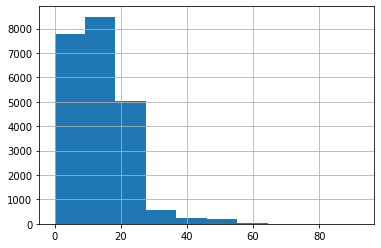

count    22315.000000
mean        14.123997
std          8.543857
min          0.000000
25%          8.000000
50%         13.000000
75%         19.000000
max         92.000000
dtype: float64

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [0]:
reviews_int = [ reviews_int[i] for i, l in enumerate(reviews_len) if l>0 ]
encoded_labels = [ encoded_labels[i] for i, l in enumerate(reviews_len) if l> 0 ]

In [0]:
def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [0]:
features=pad_features(reviews_int, 200)
print (features[:10,:])

[[    0     0     0 ...    15     7 10387]
 [    0     0     0 ...    41     2   127]
 [    0     0     0 ...     0 10388   559]
 ...
 [    0     0     0 ...     8   165    31]
 [    0     0     0 ...    31    82  1545]
 [    0     0     0 ...  6817    40   495]]


In [0]:
split_frac = 0.8
len_feat=len(features)
train_x = features[0:int(split_frac*len_feat)]
train_y = encoded_labels[0:int(split_frac*len_feat)]
remaining_x = features[int(split_frac*len_feat):]
remaining_y = encoded_labels[int(split_frac*len_feat):]
valid_x = remaining_x[0:int(len(remaining_x)*0.5)]
valid_y = remaining_y[0:int(len(remaining_y)*0.5)]
test_x = remaining_x[int(len(remaining_x)*0.5):]
test_y = remaining_y[int(len(remaining_y)*0.5):]

In [0]:
import torch
from torch.utils.data import DataLoader, TensorDataset
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(np.asarray(train_x)), torch.from_numpy(np.asarray(train_y)))
valid_data = TensorDataset(torch.from_numpy(np.asarray(valid_x)), torch.from_numpy(np.asarray(valid_y)))
test_data = TensorDataset(torch.from_numpy(np.asarray(test_x)), torch.from_numpy(np.asarray(test_y)))
# dataloaders
batch_size = 50
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size, drop_last=True)

In [0]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 200])
Sample input: 
 tensor([[   0,    0,    0,  ..., 6253, 2272,   34],
        [   0,    0,    0,  ...,  699, 7354, 5613],
        [   0,    0,    0,  ...,    1,   42,   79],
        ...,
        [   0,    0,    0,  ...,  444,   73,  722],
        [   0,    0,    0,  ...,  322,    9, 3803],
        [   0,    0,    0,  ...,    6,  901, 3500]])

Sample label size:  torch.Size([50])
Sample label: 
 tensor([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 1])


In [0]:
# First checking if GPU is available
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

No GPU available, training on CPU.


In [0]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [0]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

SentimentLSTM(
  (embedding): Embedding(37136, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [0]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


# training params

epochs = 4 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        inputs = inputs.type(torch.LongTensor)
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                inputs = inputs.type(torch.LongTensor)
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

In [0]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    inputs = inputs.type(torch.LongTensor)
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))


Test loss: 0.687
Test accuracy: 0.762


In [0]:
import ipywidgets as widgets
# back end of ipywidgets
from IPython.display import display

In [1]:
t=widgets.Textarea(
    placeholder='How are you feeling',
    description='String:',
    disabled=False
)
button=widgets.Button(
    description='Submit',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
display(t)
output = widgets.Output()

display(button, output)

#test_review_depressed=t.value
def on_button_clicked(b):
  seq_length=200 # good to use the length that was trained on
  test_review_depressed=t.value
  print(test_review_depressed)
  result=predict(net, test_review_depressed, seq_length)
  #print(result)
  rslt=widgets.Label(result)
  display(rslt)

button.on_click(on_button_clicked)

NameError: ignored

In [0]:
#test_review_depressed = 'I feel soo anxious and worried all the time, I dont know whats happening with me, I need help'
#test_review_depressed = 'my mind z just crazy, i wanna hang myself'
test_review_depressed = 'in depression'


In [3]:

from string import punctuation

def tokenize_review(test_review):
    test_review = test_review.lower() # lowercase
    # get rid of punctuation
    test_text = ''.join([c for c in test_review if c not in punctuation])

    # splitting by spaces
    test_words = test_text.split()

    # tokens
    test_ints = []
    test_ints.append([vocab_to_int[word] for word in test_words])

    return test_ints

# test code and generate tokenized review
test_ints = tokenize_review(test_review_depressed)
print(test_ints)


# test sequence padding
seq_length=200
features = pad_features(test_ints, seq_length)

print(features)


# test conversion to tensor and pass into your model
feature_tensor = torch.from_numpy(features)
print(feature_tensor.size())


def predict(net, test_review, sequence_length=200):
    
    net.eval()
    
    # tokenize review
    test_ints = tokenize_review(test_review)
    
    # pad tokenized sequence
    seq_length=sequence_length
    features = pad_features(test_ints, seq_length)
    
    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)
    
    batch_size = feature_tensor.size(0)
    
    # initialize hidden state
    h = net.init_hidden(batch_size)
    
    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()
    
    # get the output from the model
    output, h = net(feature_tensor, h)
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze()) 
    # printing output value, before rounding
    #print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))
    
    # print custom response
    if(pred.item()==1):
        return("User is depressed. Please contact therapist")
    else:
        return("User is mentally healthy, NOT depressed")

NameError: ignored

In [0]:
# depressed test review
seq_length=200 # good to use the length that was trained on
result=predict(net, test_review_depressed, seq_length)
print(result)